In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
NO1 = gpd.read_file('NO1.geojson')
NO1

,ElSpotOmr,geometry
0,NO 1,"POLYGON ((10.67500 59.04529, 11.01052 59.00418..."


In [3]:
NO_list = [gpd.read_file('NO'+str(i)+'.geojson') for i in range(1,6)]
NO = pd.concat(NO_list)
NO

,ElSpotOmr,geometry
0,NO 1,"POLYGON ((10.67500 59.04529, 11.01052 59.00418..."
0,NO 2,"POLYGON ((7.86292 60.22268, 7.74904 60.24487, ..."
0,NO 3,"POLYGON ((14.07063 64.10796, 14.09497 64.13251..."
0,NO 4,"POLYGON ((31.06432 70.28916, 31.16859 70.38684..."
0,NO 5,"POLYGON ((7.51391 61.72939, 7.51395 61.73025, ..."


C:\ProgramData\Anaconda3\envs\geojsons\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


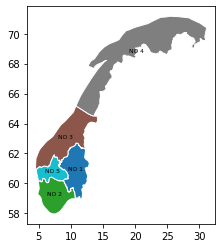

In [12]:
ax = NO.plot(column='ElSpotOmr', edgecolor='white')
NO.apply(lambda x: ax.annotate(s=x.ElSpotOmr, xy=x.geometry.centroid.coords[0], ha='center', size=6),axis=1);
plt.savefig('PriceRegions', dpi=1200)

In [43]:
NO_km=NO.to_crs({'init': 'epsg:32633'})
NO_km["area_km^2"] = NO_km['geometry'].area/ 10**6
NO_total_area=385207
sum_of_priceareas=sum(NO_km["area_km^2"])
Area_difference=NO_total_area-sum_of_priceareas
print("Area difference =",Area_difference,"\nRelative error:","{0:.0%}".format(abs(Area_difference)/NO_total_area))
NO_km

Area difference = -18169.54036715132 
Relative error: 5%


,ElSpotOmr,geometry,area_km^2
0,NO 1,"POLYGON ((251956.420 6553129.530, 270910.023 6...",61139.565729
0,NO 2,"POLYGON ((105108.439 6697599.392, 99096.308 67...",57587.081240
0,NO 3,"POLYGON ((454719.240 7109374.910, 455943.810 7...",91413.867277
0,NO 4,"POLYGON ((1098542.797 7877751.491, 1099464.857...",164633.230702
0,NO 5,"POLYGON ((105048.119 6866805.383, 105061.159 6...",28602.795419


In [13]:
Counties = gpd.read_file('fylker_komprimert.json')

In [14]:
#Counties.plot(color='red', edgecolor='white')

In [15]:
#fig, ax =plt.subplots()
#NO.plot(ax=ax, column='ElSpotOmr')
#Counties.plot(ax=ax, color='none', edgecolor='red')

In [ ]:
#NorthenEurope = gpd.read_file('custom.geo.json')
#NorthenEurope.plot()








